In [15]:
# Regularization

from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [16]:
path = './Data/'

filename_read = os.path.join(path, 'mpg.csv')
df = pd.read_csv(filename_read, na_values=['NA','?'])

In [17]:
# create feature vector

def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

missing_median(df, 'horsepower')
df.drop('name',1,inplace=True)
encode_text_dummy(df, 'origin')

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

x, y = to_xy(df, 'mpg')


C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [18]:
# split the train/test

x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.25, random_state=45)

In [11]:
%matplotlib inline

from IPython.display import display, HTML

def report_coef(names, coef, intercept):
    r = pd.DataFrame({'coef': coef, 'positive': coef>=0}, index = names)
    r = r.sort_values(by=['coef'])
    display(r)
    print("intercept:{}".format(intercept))
    r['coef'].plot(kind='barh', color = r['positive'].map({True: 'b', False: 'r'}))


In [19]:
# Linear (L1/L2)

import sklearn

regressor = sklearn.linear_model.LinearRegression()
# train linear regression
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

In [20]:
# RMSE
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("final RMSE:{}".format(score))

final RMSE:2.937157154083252


,coef,positive
origin-1,-1.448373,False
cylinders,-0.416543,False
horsepower,-0.007785,False
weight,-0.007473,False
displacement,0.024456,True
acceleration,0.138122,True
origin-3,0.629808,True
year,0.801274,True
origin-2,0.818565,True


intercept:[-18.257517]


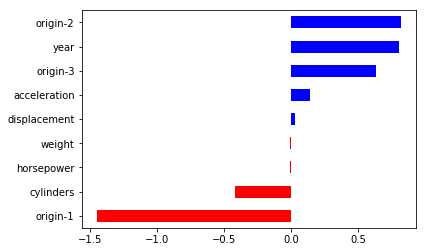

In [21]:
names = list(df.columns.values)
names.remove('mpg')
report_coef(
 names,
 regressor.coef_[0,:],
 regressor.intercept_)

In [22]:
import sklearn
from sklearn.linear_model import Lasso

regressor = Lasso(random_state=0, alpha=0.1)

regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)

In [23]:
# RMSE
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("final score: {}".format(score))

final score: 3.040905475616455


names = list(df.columns.values)
names.remove('mpg')
report_coef(
names,
regressor.coef_,
regressor.intercept_)

,coef,positive
origin-1,-1.264474,False
weight,-0.007458,False
horsepower,-0.002797,False
cylinders,-0.000000,True
origin-2,0.000000,True
origin-3,0.000000,True
displacement,0.013005,True
acceleration,0.113760,True
year,0.787195,True


intercept:[-17.271265]


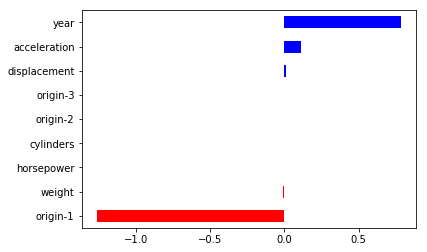

In [24]:

names = list(df.columns.values) 
names.remove('mpg') 
report_coef( names, regressor.coef_, regressor.intercept_)

In [25]:
import sklearn
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=1)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.879740e-09
  overwrite_a=True).T


In [26]:
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("RMSE:{}".format(score))

RMSE:2.941314935684204


,coef,positive
origin-1,-1.420928,False
cylinders,-0.409650,False
horsepower,-0.007524,False
weight,-0.007473,False
displacement,0.024127,True
acceleration,0.137981,True
origin-3,0.619081,True
year,0.800767,True
origin-2,0.801789,True


intercept:[-18.230413]


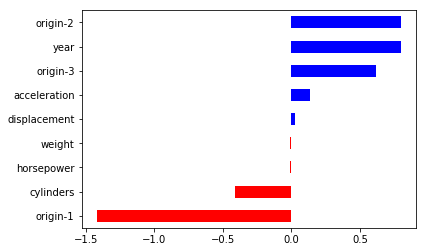

In [29]:
names = list(df.columns.values)
names.remove('mpg')
report_coef(names,
           regressor.coef_[0,:],
           regressor.intercept_)

In [30]:
import sklearn
from sklearn.linear_model import ElasticNet

regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)
regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)

In [33]:
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("RMSE:{}".format(score))

RMSE:3.031985282897949


,coef,positive
origin-1,-0.938924,False
cylinders,-0.257568,False
weight,-0.007462,False
horsepower,-0.002896,False
displacement,0.017533,True
acceleration,0.131320,True
origin-3,0.369088,True
origin-2,0.458725,True
year,0.788913,True


intercept:[-17.480097]


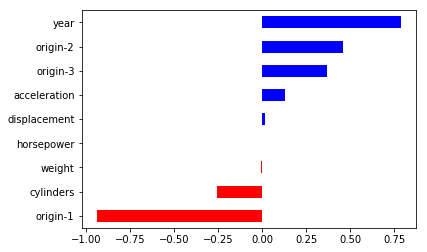

In [34]:
names = list(df.columns.values)
names.remove('mpg')
report_coef(names,
           regressor.coef_,
           regressor.intercept_)